In [10]:
from scipy import stats
import numpy as np
import pandas as pd

In [11]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [12]:
def z_stat(x, mu0, sigma, n):
    z = (x - mu0)/(sigma/(n**0.5))
    return z

In [13]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [14]:
x = 3075
sigma = 500
mu0 = 2800
n = 25

In [15]:
proportions_diff_z_test(z_stat(x, mu0, sigma, n))

0.005959526470109111

In [16]:
interval = _tconfint_generic(x,
                             sigma/(n**0.5),
                             n-1,
                             0.05, 'two-sided')

In [211]:
print("95%% confidence interval", interval[0]-mu0, interval[1]-mu0)

95%% confidence interval 68.61014383719794 481.38985616280206


In [20]:
interval2 = _tconfint_generic(x,
                             sigma/(n**0.5),
                             n-1,
                             0.05, 'larger')

In [23]:
print("95%% confidence interval", interval2[0]-mu0)

95%% confidence interval 103.91179200905708


In [222]:
def proportions_diff_t_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.t.cdf(np.abs(z_stat),n-1))
    
    if alternative == 'less':
        return scipy.stats.t.cdf(z_stat,n-1)

    if alternative == 'greater':
        return 1 - scipy.stats.t.cdf(z_stat,n-1)

In [223]:
proportions_diff_t_z_test(z_stat(x, mu0, sigma, n), alternative = 'greater')

0.005573914906340183

Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [226]:
x = 9.5
sigma = 0.4
mu0 = 9.57
n = 160

In [227]:
proportions_diff_z_test(z_stat(x, mu0, sigma, n))

0.026856695507523787

Имеются данные о стоимости и размерах 53940 бриллиантов.
Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1).

На обучающей выборке настройте две регрессионные модели:

1. линейную регрессию с помощью LinearRegression без параметров
2. случайный лес с помощью RandomForestRegressor с random_state=1.

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [264]:
diamonds = pd.read_table('diamonds.txt')
diamonds.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [265]:
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [280]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [281]:
y_pred_lr = lr.predict(X_test)

In [282]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [283]:
y_pred_rf = rf.predict(X_test)

In [284]:
deviation_lr = np.abs(y_pred_lr - y_test)
deviation_rf = np.abs(y_pred_rf - y_test)

In [285]:
import matplotlib.pyplot as plt

((array([-3.88388616, -3.66274206, -3.54151337, ...,  3.54151337,
          3.66274206,  3.88388616]),
  array([-6109.97686053, -5636.77396851, -5523.53373191, ...,
          8839.29300989, 10824.7757726 , 15105.14636008])),
 (716.7534700651934, 87.4558831561486, 0.918518811990734))

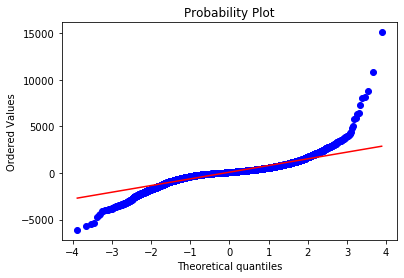

In [286]:
stats.probplot(deviation_lr - deviation_rf, dist="norm", plot=plt)

In [287]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(deviation_lr - deviation_rf))

Shapiro-Wilk normality test, W-statistic: 0.844494, p-value: 0.000000


C:\Users\Alexey\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [288]:
stats.ttest_rel(deviation_lr, deviation_rf)

Ttest_relResult(statistic=13.017729783878572, pvalue=1.655174575141068e-38)

In [289]:
from statsmodels.stats.weightstats import DescrStatsW

In [294]:
conf = DescrStatsW(deviation_lr - deviation_rf).tconfint_mean()
print("95%% confidence interval: [{}, {}]".format(conf[0], conf[1]))

95%% confidence interval: [74.28724532595453, 100.62452098634304]


In [298]:
round(conf[0],-1)

70.0